# Depression Dataset

### Arely Hilda Luis Tiburcio

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
# Leer el data frame
df = pd.read_csv('b_depressed.csv'); df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


## Exploración de datos

In [143]:
# Verificar los tipos de dato de cada una de las columnas del conjunto de datos.
df.dtypes

Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

In [144]:
# Verificar las dimensiones del dataset.
df.shape

(1429, 23)

In [145]:
# Verificar el nombre de los atributos.
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [146]:
# Verificar si existen datos faltantes.
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

## Limpieza de datos

In [147]:
# Eliminar columnas que no se desean tomar en cuenta para el análisis
df.drop(['Ville_id', 'Survey_id','incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen'], axis = 'columns', inplace=True)

In [148]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary', 'depressed'],
      dtype='object')

## Análisis Estadístico

In [149]:
# Encontrar el total de personas diagnósticadas con depresión y las que no.


import plotly.express as px


fig1 = px.histogram(df, x='education_level')
fig1.show()

In [150]:
# Graficar las edades de los participantes.

fig2 = px.histogram(df, x="Age")
fig2.show()

In [151]:
# Graficar el porcentaje de mujeres y hombres.
# 0 - hombres
# 1 - mujeres

fig3 = px.pie(df, names="sex")
fig3.show()

In [152]:
# Graficar el estado civil
# 0 - solterxs
# 1 - casadxs

fig4 = px.pie(df, names="Married")
fig4.show()

In [153]:
# Calcular la media de edad de los encuestados
df['Age'].mean()

34.77746675997201

In [154]:
# Calcular la media del nivel de estudios
df['education_level'].mean()

8.687193841847446

## Normalizar los datos

In [155]:
# Normalizar nuestro dataset
def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

df_norm = pd.DataFrame(minmax_norm(df)); df_norm

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,depressed
0,1.0,0.148649,1.0,0.363636,0.500000,0.363636,0.289336,0.228242,0.232843,0.266876,0.281283,0.0,0.0
1,1.0,0.081081,1.0,0.272727,0.388889,0.363636,0.289336,0.228242,0.232843,0.266876,0.281283,0.0,1.0
2,1.0,0.067568,1.0,0.272727,0.444444,0.363636,0.289336,0.228242,0.232843,0.266876,0.281283,0.0,0.0
3,1.0,0.135135,1.0,0.181818,0.500000,0.272727,0.529764,0.196438,0.495968,0.001361,0.440230,0.0,0.0
4,0.0,0.567568,0.0,0.363636,0.500000,0.454545,0.832785,0.172846,0.232843,0.814024,0.745910,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,1.0,0.108108,1.0,0.090909,0.333333,0.363636,0.289336,0.228242,0.232843,0.266876,0.281283,0.0,0.0
1425,1.0,0.148649,1.0,0.363636,0.500000,0.454545,0.155725,0.239917,0.153714,0.103136,0.716660,0.0,0.0
1426,1.0,0.662162,0.0,0.000000,0.000000,0.000000,0.426261,0.228242,0.224449,0.124025,0.565588,0.0,1.0
1427,1.0,0.459459,1.0,0.090909,0.611111,0.363636,0.289336,0.228242,0.232843,0.266876,0.281283,0.0,0.0


## Métodos de aprendizaje no supervisado

### 1.- Clustering

In [156]:
# Hacer un dendrograma del conjunto de datos

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram



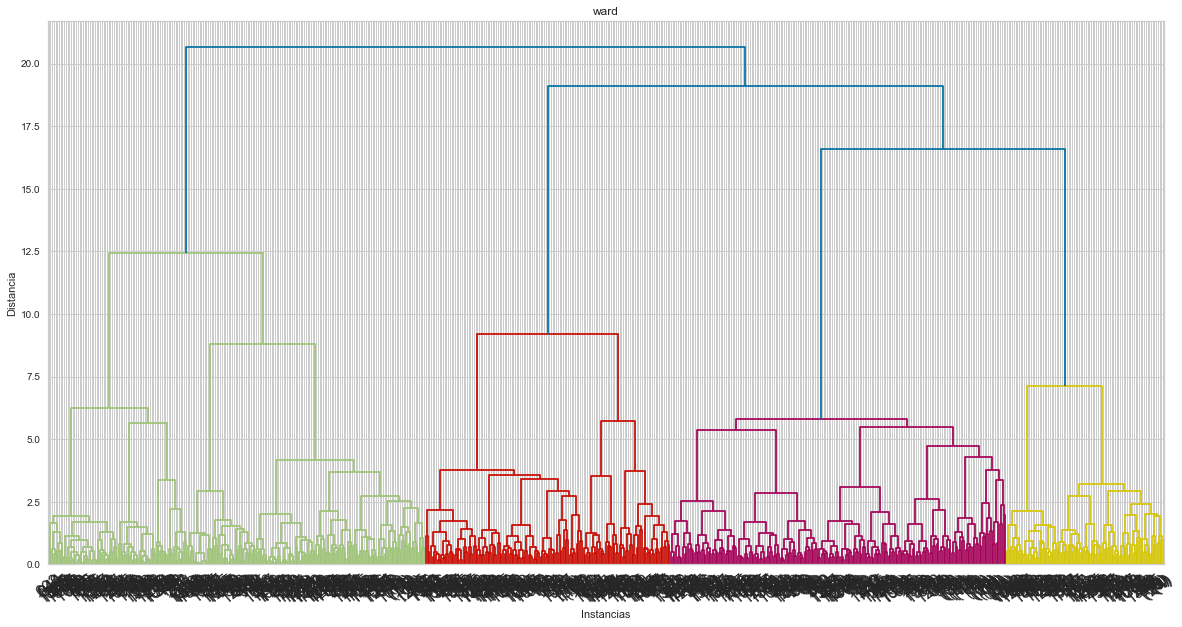

In [157]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
criterios = ['ward']

for crit, eje in zip(criterios,fig.axes):
    C = linkage(y=df_norm, method=crit, metric='euclidean', )
    eje.set_title(crit)
    eje.set_xlabel('Instancias')
    eje.set_ylabel('Distancia')
    dendrogram(C, ax=eje, labels=df.index,
              leaf_rotation=40, leaf_font_size=16, truncate_mode='level', p=10)

### - Se pueden observar la formación de 4 clusters principales según el dendrograma 

### 2.- K  Means

### ¿Cómo elegir la K ?

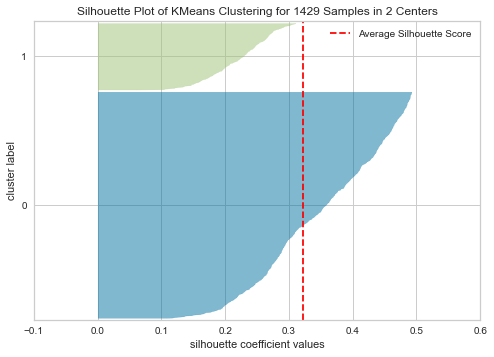

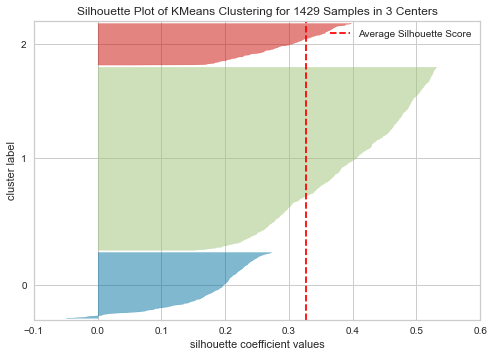

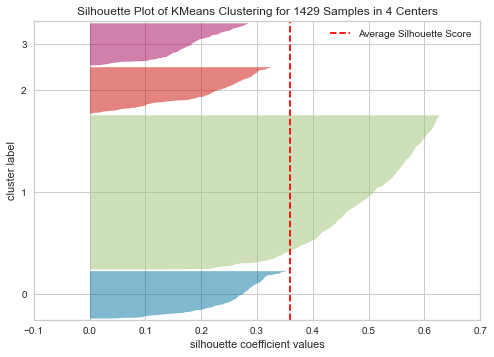

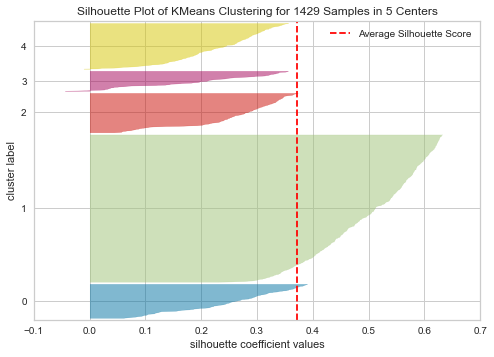

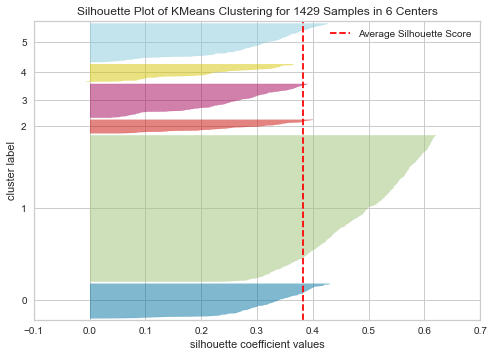

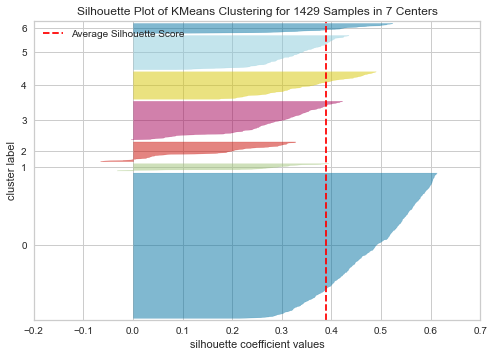

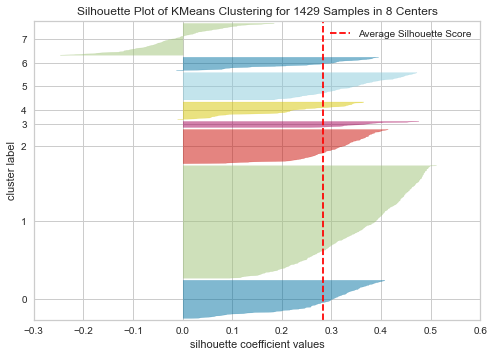

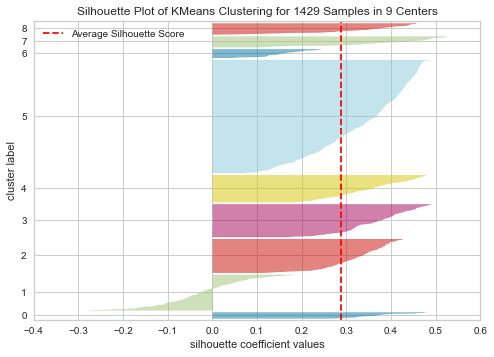

In [158]:
# Aplicar el índice de Silhouette para tener otra manera de elegir la k.

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


for i in range(2,10):
  model = KMeans(i, random_state=None)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(df_norm)      
  visualizer.show()

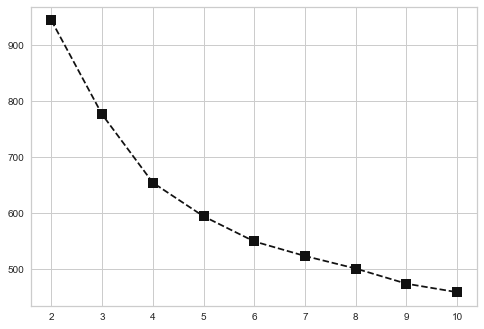

In [159]:
kRange = range(2,11)
inertia = []
for k in kRange:
    grupos = KMeans(n_clusters=k).fit(df_norm)
    inertia.append(grupos.inertia_)
    
plt.plot(kRange, inertia,'--sk',markersize=10)

In [160]:
# Utiliza KMeans de sklearn para llevar a cabo el agrupamiento con el k seleccionado

from sklearn.cluster import KMeans


km = KMeans(n_clusters=4, init='random', n_init=1).fit(df_norm)


In [161]:
df['Kmeans_Clusters'] = km.labels_

In [162]:
df.head()

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,depressed,Kmeans_Clusters
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,28203066,0,0,2
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,28203066,0,1,1
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,28203066,0,0,2
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,44042267,0,0,2
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,74503502,1,0,0


In [163]:
# Utilizar reducción de dimensionalidad para 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_depression = pca.fit_transform(df_norm)
pca_depression_df = pd.DataFrame(data=pca_depression, columns = ['Componente_1', 'Componente_2'])
pca_nombres_depression = pd.concat([pca_depression_df, df[['Kmeans_Clusters']]], axis=1)

pca_nombres_depression

,Componente_1,Componente_2,Kmeans_Clusters
0,-0.282467,-0.200899,2
1,-0.099564,-0.226443,1
2,-0.282629,-0.196950,2
3,-0.252420,-0.196086,2
4,0.878539,0.959177,0
...,...,...,...
1424,-0.241062,-0.192614,2
1425,-0.298042,-0.206683,2
1426,1.034875,-0.166543,0
1427,-0.195615,-0.198112,2


<AxesSubplot:xlabel='Componente_1', ylabel='Componente_2'>

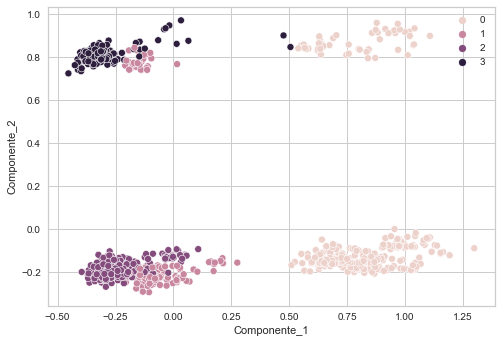

In [164]:
sns.scatterplot(data=df, x = pca_nombres_depression.Componente_1, y = pca_nombres_depression.Componente_2, hue=km.labels_)

## Tablero interactivo

In [165]:
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

In [166]:
tab1 = JupyterDash(__name__,
                  external_stylesheets =[dbc.themes.BOOTSTRAP])

edad = sorted(list(df.Age.unique()))
menuy = dcc.Dropdown(id='menuy',
                options = [{'label':n,'value':n} for n in edad],
                value = '')



ejeEstadoC = dcc.Graph(id = 'grafica_EstadoC')
ejeGenero = dcc.Graph(id = 'grafica_Genero')
ejeDiagnostico = dcc.Graph(id = 'grafica_Diagnostico')


# Layout

tab1.layout = html.Div([
    
    html.H1('Depresión', 
    style = {'color':'black', "fontSize":'60px'}),
    
    html.Div([html.H4('Selecciona la edad'), menuy]), #Seleccionar Año
        
    html.Br(),
    html.Br(),
    
    dbc.Row([
        dbc.Col(html.Div(ejeEstadoC),
               width = 6),
        
        dbc.Col(html.Div(ejeGenero),
               width = 6),
        
        dbc.Col(html.Div(ejeDiagnostico),
               width = 6)
        
        
    ]),
    

])


# Callbacks
@tab1.callback([Output('grafica_EstadoC','figure'),
               Output('grafica_Genero','figure')],
               Output('grafica_Diagnostico','figure'),
              Input('menuy','value'))
                                                         


def crearGrafica(yespecifico):
    dfAge = df[df.Age == int(yespecifico)]
    
    datosEstadoC = dfAge.groupby('Age')['Married'].mean().reset_index()
    datosGenero = dfAge.groupby('Age')['sex'].mean().reset_index()
    datosDiagnostico = dfAge.groupby('Age')['depressed'].mean().reset_index()
    
 

    tr1 = go.Scatter(x = df['Age'],
                    y = dfAge['Married'],
                    mode = 'markers+lines',
                    marker = {'color': 'green'})
    
    fig1 = go.Figure(data = tr1)
    fig1.update_layout(title = 'Married',
                     xaxis_title = 'Age',
                     yaxis_title = 'Married')
    
    #Grafica Carrier
    tr2 = go.Scatter(x = df['Age'],
                    y = dfAge['sex'],
                    mode = 'markers+lines',
                    marker = {'color': 'green'})
    
    fig2 = go.Figure(data = tr2)
    fig2.update_layout(title = 'Gender',
                     xaxis_title = 'Age',
                     yaxis_title = 'Gender')
    
    # Gráfica Weather
    tr3 = go.Scatter(x = df['Age'],
                    y = dfAge['depressed'],
                    mode = 'markers+lines',
                    marker = {'color': 'green'})
    
    fig3 = go.Figure(data = tr3)
    fig3.update_layout(title = 'Depressed',
                     xaxis_title = 'Age',
                     yaxis_title = 'Depressed')
    
    return fig1,fig2,fig3

if __name__ == "__main__":
    tab1.run_server(debug=True, port = 8885)

Dash app running on http://127.0.0.1:8885/
